In [6]:
import json
from dotenv import load_dotenv
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from langchain_core.output_parsers import StrOutputParser, PydanticOutputParser
from langchain_google_genai import ChatGoogleGenerativeAI, GoogleGenerativeAIEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langchain_community.tools.tavily_search import TavilySearchResults

from langgraph.graph import StateGraph, MessagesState, START, END, MessageGraph
from IPython.display import display, Image
from typing import TypedDict, Annotated, Literal
from pydantic import BaseModel, Field
import operator
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

load_dotenv("../.env")
llm = ChatGroq(
    # model="llama3-groq-70b-8192-tool-use-preview",
    model="llama-3.1-70b-versatile",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)
#embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

memory = MemorySaver()
config = {"configurable": {"thread_id": 1}}

### A Simple Example

In [2]:
def add_text(input:list[HumanMessage]):
    """Add text to the input list of HumanMessage objects."""
    input[0].content +=" Amazing_ "
    return input

In [7]:
graph = MessageGraph()

node1_id = "node1"
node2_id = "node2"
node3_id = "node3"
node4_id = "node4"

graph.add_node(node1_id, add_text)
graph.add_node(node2_id, add_text)
graph.add_node(node3_id, add_text)
graph.add_node(node4_id, add_text)

graph.add_edge(node1_id, node2_id)
graph.add_edge(node1_id, node3_id)
graph.add_edge(node2_id, node4_id)
graph.add_edge(node3_id, node4_id)

graph.add_edge(START, node1_id)
graph.add_edge(node4_id, END)

app = graph.compile()

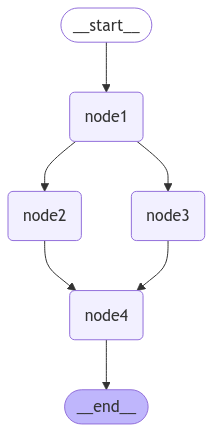

In [8]:
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
def save_graph(runnable_graph, file_path):
    png_out = runnable_graph.get_graph().draw_mermaid_png()
    with open(file_path, "wb") as f:
        f.write(png_out)

In [13]:
save_graph(app, "first_run.png")

In [17]:
print(app.invoke("Ai is")[0].content)

Ai is Amazing_  Amazing_  Amazing_  Amazing_ 
